# <center>**Case Study - Startup Dataset**</center>

**This dataset has funding information of the Indian startups from January 2015 to October 2020.**

**Feature Details :**

**SNo** - Serial number.

**Date** - Date of funding in format DD/MM/YYYY.

**StartupName** - Name of the startup which got funded.

**IndustryVertical** - Industry to which the startup belongs.

**SubVertical** - Sub-category of the industry type.

**CityLocation** - City which the startup is based out of.

**InvestorsName** - Name of the investors involved in the funding round.

**InvestmentType** - Either Private Equity or Seed Funding.

**AmountInUSD** - Funding Amount in USD.

**Remarks** - Other information, if any.


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('startup_funding.csv')

In [155]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [156]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [158]:
df.rename(columns = {'Date dd/mm/yyyy':'Date'}, inplace=True)

In [159]:
df[df.Date == '05/072018']

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000",NaN


In [160]:
#correcting the value at 192 position in Date column
#As while converting it into date time format, got an error
#Because date was in "05/072018" this format, hence corrected it.

df.loc[192,'Date'] = '05/07/2018'

In [161]:
df.loc[875,'Date']

'08/04/2017'

In [162]:
#Using errors = coerce because while converting it to data time format, got an error
#OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 15-01-07 00:00:00 present at position 875
#Therefore errors = coerce will handle/replace any values that cannot be converted to valid timestamps to NAT(not a time)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [163]:
#Here column named "Date dd/mm/yyyy" is changed to "Date" for simplicity purpose.
#The Dtype of "Date" column is changed from to "datetime64[ns]" format, so that specific operations can be perfomed.
#During this converion we have lost 3 value i.e, from 3044 non full entries to 3041 enties only.
#All those lost values were OutOfBoundsDatetime values which was handled by "errors='coerce'" in the above code

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date               3041 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      2084 non-null   object        
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 237.9+ KB


**Insights -**

1) Find out what type of startups are getting funded in the last few years?

2) Who are the important investors?

3) What are the hot fields that get a lot of funding these days?


**1) Find out what type of startups are getting funded in the last few years?**

In [164]:
df['Year'] = df['Date'].dt.year

In [165]:
# Ecommerce is the right word in IndustryVertical, so correcting it.
df['Industry Vertical']=df['Industry Vertical'].astype(str)
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x : x.replace(x,'Ecommerce') if 'Commerce' in x else x.replace(x,'Ecommerce') if 'commerce' in x
                                                        else x.replace(x,'FinTech') if 'Fin-Tech' in x else x)

In [166]:
#This dataset consist of data from year 2015 to year 2020
#So as per the question I have assumed last 3 years to be last few years to analyze
#for type of startups are getting funded in the last few years

last_few_years = df[df['Year'].between(2018, 2020)]

In [167]:
#Now Getting the count of Industry Vertical to get to know that
#which kind of startups are igetting funded most in terms of frequency.
#for the year in range of 2018 to 2020

stp_count = last_few_years['Industry Vertical'].value_counts()
stp_count.sort_values(ascending=False)

Consumer Internet    93
Technology           65
Finance              45
Ecommerce            34
Healthcare           34
                     ..
Publishing            1
Entertainment         1
Online Education      1
Luxury Label          1
Consumer internet     1
Name: Industry Vertical, Length: 83, dtype: int64

In [168]:
#Since there are 87 kind of industry vertical and visualizing them all together might be messier
#Therefore only visualizing top 10 industry verticals who have higher number of frequency in geeting funded

stp_count_ten = stp_count.sort_values(ascending=False).head(10)
stp_count_ten

Consumer Internet      93
Technology             65
Finance                45
Ecommerce              34
Healthcare             34
FinTech                15
Ed-Tech                12
IT                      8
Food and Beverage       6
Health and Wellness     5
Name: Industry Vertical, dtype: int64

In [169]:
bold = '\033[1m'
reset = '\033[0m'
print(f'{bold}List of top 10 type of startups are getting funded in the last few years --{reset}')
for i in stp_count_ten.index:
  print(f'{bold}=>{i}')

List of top 10 type of startups are getting funded in the last few years --
=>Consumer Internet
=>Technology
=>Finance
=>Ecommerce
=>Healthcare
=>FinTech
=>Ed-Tech
=>IT
=>Food and Beverage
=>Health and Wellness


Text(0.5, 1.0, 'Industry Vertical vs Frequency of Funding')

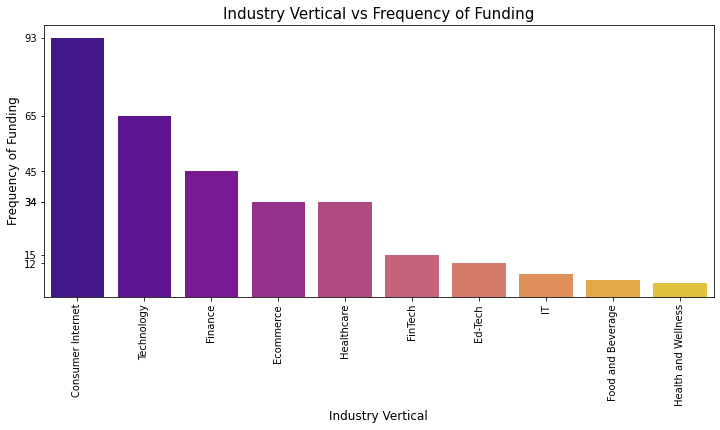

In [170]:
plt.figure(figsize=(12,5))
sns.barplot(x=stp_count_ten.index, y=stp_count_ten, palette='plasma')
plt.xticks(rotation=90)
plt.yticks(stp_count_ten[0:7])
plt.ylabel('Frequency of Funding', fontsize=12)
plt.xlabel('Industry Vertical', fontsize=12)
plt.title('Industry Vertical vs Frequency of Funding', fontsize=15)

**2) Who are the important investors?**

In [171]:
#In order to know who are the important investors, whose frquency of funding is
#more then the other investors in last few years (2018-2020)

last_few_years['Investors Name'].value_counts()

Tiger Global Management                                  4
Alteria Capital                                          3
Naspers                                                  2
Nexus Venture Partners                                   2
Sunil Munjal, Harsh Mariwala, Dalip Pathak and Others    2
                                                        ..
Fosun International                                      1
Credence Family Office                                   1
ZigExN                                                   1
Ravi Viswanathan                                         1
HDFC Bank, Axis Bank                                     1
Name: Investors Name, Length: 392, dtype: int64

In [172]:
#Top five name of the investors in year between 2018-2020

in_count_ten = last_few_years['Investors Name'].value_counts().sort_values(ascending=False).head(5)
in_count_ten

Tiger Global Management    4
Alteria Capital            3
SoftBank Vision Fund       2
March Capital Partners     2
Trifecta Capital           2
Name: Investors Name, dtype: int64

In [173]:
bold = '\033[1m'
reset = '\033[0m'
print(f'{bold}List of  the important investors --{reset}')
for j in in_count_ten.index:
  print(f'{bold}=>{j}')

List of  the important investors --
=>Tiger Global Management
=>Alteria Capital
=>SoftBank Vision Fund
=>March Capital Partners
=>Trifecta Capital


In [174]:
#Now getting to know in which kind of Industry vertical these top five investors are funding.

In_st = last_few_years[last_few_years['Investors Name'].isin(in_count_ten.index)]
In_st

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020.0
16,17,2019-12-20,Lenskart.com,Ecommerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,"23,10,00,000",NaN,2019.0
51,52,2019-08-13,Uniphore,Customer Service Platform,Conversational AI,Palo Alto,March Capital Partners,Series C,"5,10,00,000",NaN,2019.0
55,56,2019-08-22,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,"1,50,00,000",NaN,2019.0
65,66,2019-01-07,Uniphore,Artificial Intelligence,Speech Recognition,Taramani,March Capital Partners,Series C,"3,80,80,000",NaN,2019.0
85,86,2019-10-06,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,"1,55,00,000",NaN,2019.0
87,88,2019-08-06,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Karnataka,Alteria Capital,Debt Funding,"35,84,000",NaN,2019.0
93,94,2019-02-05,Zenoti,Saas,Beauty and Wellness Industry,Hyderabad,Tiger Global Management,Series C,"5,00,00,000",NaN,2019.0
135,136,2018-11-19,Automation Anywhere,Automation,Robotics,California,SoftBank Vision Fund,Series B,"30,00,00,000",NaN,2018.0
181,182,2018-08-20,RawPressery,Consumer Internet,Online Organic Juice Delivery Service,Mumbai,Alteria Capital,Debt Funding,"48,00,000",NaN,2018.0


In [175]:
grouped_in = In_st.groupby(['Investors Name', 'Industry Vertical']).size().reset_index()
grouped_in

,Investors Name,Industry Vertical,0
0,Alteria Capital,Consumer Internet,2
1,Alteria Capital,Transportation,1
2,March Capital Partners,Artificial Intelligence,1
3,March Capital Partners,Customer Service Platform,1
4,SoftBank Vision Fund,Automation,1
5,SoftBank Vision Fund,Ecommerce,1
6,Tiger Global Management,E-Tech,1
7,Tiger Global Management,FinTech,2
8,Tiger Global Management,Saas,1
9,Trifecta Capital,Consumer Internet,1


Text(0.5, 1.0, 'Investments by Investor and Industry')

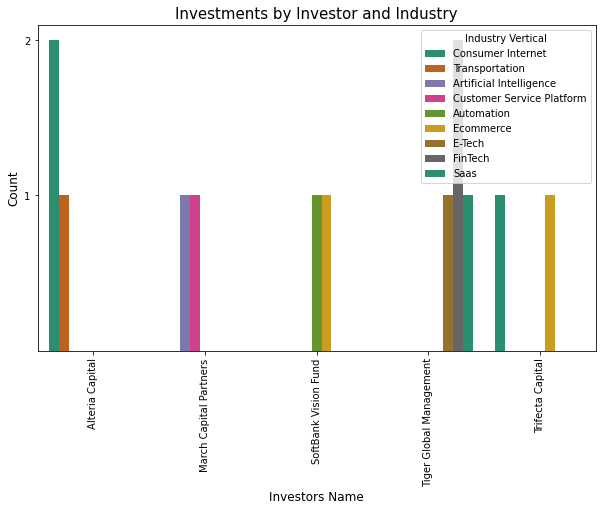

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_in, y=grouped_in.columns[2], x='Investors Name', hue='Industry Vertical', palette='Dark2')
plt.xticks(rotation=90)
plt.yticks([1,2])
plt.xlabel('Investors Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Investments by Investor and Industry', fontsize=15)

**3) What are the hot fields that get a lot of funding these days?**

In [177]:
#List of top 10 hot fields that are getting funding these days (2019- 2020)

y1=last_few_years[last_few_years['Year'].between(2019,2020)].SubVertical.value_counts().sort_values(ascending=False).head(10).reset_index()
y1

,index,SubVertical
0,E-learning,3
1,Logistics,3
2,Optimization,2
3,Cabs,2
4,Brewery,2
5,Financial Services,2
6,FinTech,2
7,Wealth Management,2
8,Agritech,2
9,"Open-market, freight management platform",1


In [178]:
#List of top 10 hot fields that are getting funding (2015- 2020)

y2=df.SubVertical.value_counts().sort_values(ascending=False).head(10).reset_index()
y2

,index,SubVertical
0,Online Lending Platform,11
1,Online Pharmacy,10
2,Food Delivery Platform,8
3,Online Education Platform,5
4,Education,5
5,Online lending platform,5
6,Online Learning Platform,5
7,Online Lending,5
8,Online Food Delivery,4
9,Non-Banking Financial Company,4


In [179]:
#List of top 10 hot fields that are getting funding (2018- 2020)

y3=last_few_years.SubVertical.value_counts().sort_values(ascending=False).head(10).reset_index()
y3

,index,SubVertical
0,Online Lending Platform,9
1,Education,5
2,Online Lending,5
3,Online Education Platform,4
4,Non-Banking Financial Company,3
5,Logistics,3
6,Agri-tech,3
7,SaaS,3
8,Online Food Delivery,3
9,E-learning,3


[Text(0, 0, 'Online Lending Platform'),
 Text(1, 0, 'Online Pharmacy'),
 Text(2, 0, 'Food Delivery Platform'),
 Text(3, 0, 'Online Education Platform'),
 Text(4, 0, 'Education'),
 Text(5, 0, 'Online lending platform'),
 Text(6, 0, 'Online Learning Platform'),
 Text(7, 0, 'Online Lending'),
 Text(8, 0, 'Online Food Delivery'),
 Text(9, 0, 'Non-Banking Financial Company')]

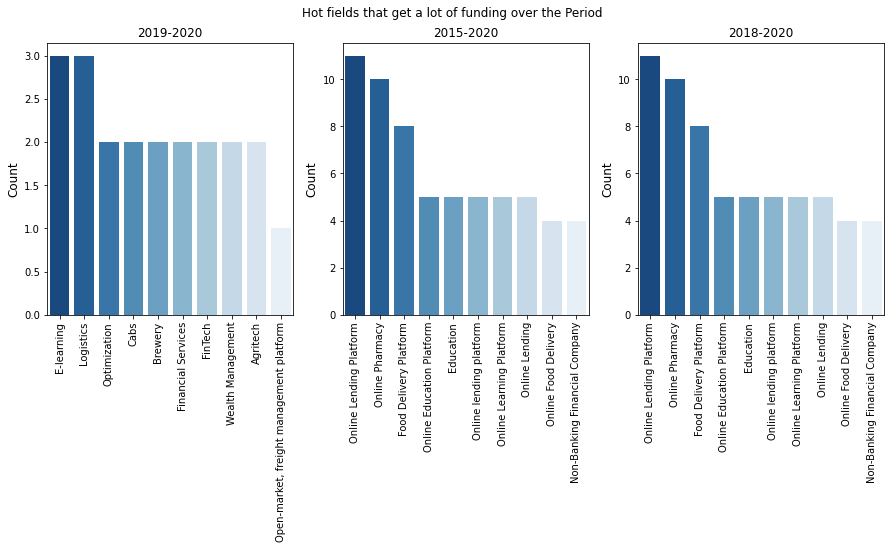

In [180]:
fig , ax = plt.subplots(1,3, figsize=(15,5))

fig.suptitle('Hot fields that get a lot of funding over the Period')

sns.barplot(x='index', y='SubVertical', data=y1, ax=ax[0],palette='Blues_r')
ax[0].set_title('2019-2020')
ax[0].set_ylabel('Count',fontsize=12)
ax[0].set_xlabel('')
ax[0].set_xticklabels(y1['index'],rotation=90)

sns.barplot(x='index', y='SubVertical', data=y2, ax=ax[1],palette='Blues_r')
ax[1].set_title('2015-2020')
ax[1].set_ylabel('Count',fontsize=12)
ax[1].set_xlabel('')
ax[1].set_xticklabels(y2['index'],rotation=90)

sns.barplot(x='index', y='SubVertical', data=y2, ax=ax[2],palette='Blues_r')
ax[2].set_title('2018-2020')
ax[2].set_ylabel('Count',fontsize=12)
ax[2].set_xlabel('')
ax[2].set_xticklabels(y2['index'],rotation=90)

**Problem Statement :**

4) Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.

5) Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

6)Print year-wise total number of fundings also. Print years in ascending order.


**4) Total number of fundings done in each year.**

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date               3041 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  3044 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      2084 non-null   object        
 9   Remarks            419 non-null    object        
 10  Year               3041 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 261.7+ KB


In [182]:
#replacing or changing the value format to convert it into float

df['Amount in USD']=df['Amount in USD'].str.replace(',','')
df['Amount in USD']=df['Amount in USD'].str.replace('+','')

C:\Users\walee\AppData\Local\Temp/ipykernel_1356/3373895847.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount in USD']=df['Amount in USD'].str.replace('+','')


In [183]:
#some of the positions have ['undisclosed','Undisclosed','unknown'] kind of values therefore locating those positions

l=df[df['Amount in USD'].isin(['undisclosed','Undisclosed','unknown'])]
l

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Year
20,21,2019-11-17,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,undisclosed,NaN,2019.0
34,35,2019-10-21,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,unknown,NaN,2019.0
58,59,2019-08-19,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed,NaN,2019.0
89,90,2019-06-05,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed,NaN,2019.0
91,92,2019-05-05,StyleDotMe,Ecommerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,undisclosed,NaN,2019.0
112,113,2019-01-02,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed,NaN,2019.0
139,140,2018-11-22,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,Undisclosed,NaN,2018.0


In [184]:
#dropping all the rows where ['undisclosed','Undisclosed','unknown'] values are present

df.drop(l.index, inplace=True)

In [185]:
#some of the positions have values which cannot be converted to umerical data
#therefore errors='coerce' will replace the non convertible values to NAN (not a number).

df['Amount in USD']=pd.to_numeric(df['Amount in USD'], errors='coerce')

In [186]:
df['Amount in USD'].isnull().sum()

971

In [187]:
#Filling the null values with 0

df['Amount in USD']=df['Amount in USD'].fillna(0)

In [188]:
#now we have all the entries in the 'Amount in USD' coulumn.
#but earlier values which were null or unacceptable is being converted or filled with 0.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3037 non-null   int64         
 1   Date               3034 non-null   datetime64[ns]
 2   Startup Name       3037 non-null   object        
 3   Industry Vertical  3037 non-null   object        
 4   SubVertical        2101 non-null   object        
 5   City  Location     2857 non-null   object        
 6   Investors Name     3013 non-null   object        
 7   InvestmentnType    3033 non-null   object        
 8   Amount in USD      3037 non-null   float64       
 9   Remarks            419 non-null    object        
 10  Year               3034 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 284.7+ KB


In [189]:
#Note here I am using size() instead of count() because in info() year count is 3041
#whereas "Amount in USD " is 2066 , and after fillig the 971  "NA" values with zero I have now have 3037 non null values.
#and if i use count() then it will not include the null or zero values, but if year is present means funding
#is been provided but the data is missing

Year_wise_funding_count=df.groupby('Year')['Amount in USD'].size().reset_index()
Year_wise_funding_count

,Year,Amount in USD
0,2015.0,933
1,2016.0,993
2,2017.0,687
3,2018.0,309
4,2019.0,105
5,2020.0,7


**5) Plot a line graph between year and number of fundings.Take year on x-axis and number of fundings on y-axis.**

([<matplotlib.axis.YTick at 0x2131db1c610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

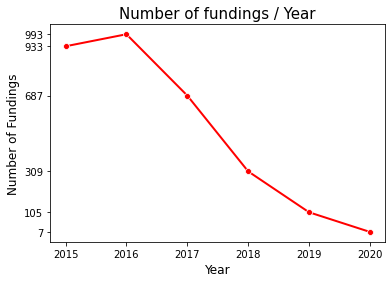

In [190]:
sns.lineplot(x='Year',y='Amount in USD', data=Year_wise_funding_count, linewidth=2, color='red', marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Fundings', fontsize=12)
plt.title('Number of fundings / Year', fontsize=15)
plt.yticks(Year_wise_funding_count['Amount in USD'])

**6)Print year-wise total number of fundings also. Print years in ascending order.**

In [191]:
Year_wise_funding_amount=df.groupby('Year')['Amount in USD'].sum().reset_index()
Year_wise_funding_amount

,Year,Amount in USD
0,2015.0,8.600357e+09
1,2016.0,3.828089e+09
2,2017.0,1.042931e+10
3,2018.0,5.122368e+09
4,2019.0,9.700919e+09
5,2020.0,3.902073e+08


In [192]:
bold = '\033[1m'
reset = '\033[0m'
year = Year_wise_funding_amount['Year']
total_amount = Year_wise_funding_amount['Amount in USD']
my_dict = dict(zip(year, total_amount))
print(f'{bold}Year Wise Total Funding is as follows --')
for key, value in my_dict.items():
  print(f'{bold}=>{reset}In year {bold}{int(key)}{reset} total funding received was {bold}{value}{reset}')

Year Wise Total Funding is as follows --
=>In year 2015 total funding received was 8600357368.0
=>In year 2016 total funding received was 3828088608.0
=>In year 2017 total funding received was 10429309730.0
=>In year 2018 total funding received was 5122368369.0
=>In year 2019 total funding received was 9700918535.22
=>In year 2020 total funding received was 390207254.0


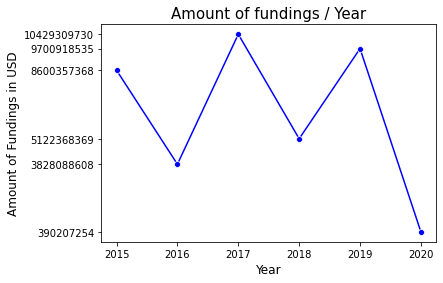

In [193]:
sns.lineplot(x='Year',y='Amount in USD', data=Year_wise_funding_amount, linewidth=1.5, color='blue', marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Amount of Fundings in USD', fontsize=12)
plt.title('Amount of fundings / Year', fontsize=15)
plt.yticks(Year_wise_funding_amount['Amount in USD'])
plt.ticklabel_format(style='plain', axis='y')

**Problem Statement :**

7) Find out which cities are generally chosen for starting a startup.

8) Find top 10 Indian cities which have most number of startups ?

9) Plot a pie chart and visualise it.

10) Print the city name and number of startups in that city also.


**Note**

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place,
instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign.

Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.


In [194]:
df['City  Location'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [195]:
df.dropna(subset=['City  Location'], inplace=True)

In [196]:
#For few startups multiple locations are given, one Indian and one Foreign.
#therefore taking  those startups in Indian startup also.
#In most of the cases Indian city names are at first position, so taking only first position.

df['City  Location']=df['City  Location'].apply(lambda x : x.split('/')[0] if '/' in x else x)

In [197]:
#Cleaning the data in "City  Location" column
#correcting the values which are indicating the same cities but have variation in spellings and are case sensitive
#and also correcting the values which are not in proper string format.

df['City  Location'] = df['City  Location'].replace('Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Gurugram', 'Gurgaon')
df['City  Location'] = df['City  Location'].replace('New York, Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Delhi & Cambridge', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Kolkatta', 'Kolkata')
df['City  Location'] = df['City  Location'].replace('Ahemadabad', 'Ahemdabad')
df['City  Location'] = df['City  Location'].replace('Bhubaneswar', 'Bhubneswar')
df['City  Location'] = df['City  Location'].replace('Nw Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0Noida', 'Noida')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0Bangalore', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0Gurgaon', 'Gurgaon')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0New Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('\\\\xc2\\\\xa0Mumbai', 'Mumbai')

In [198]:
#After doing above operation "Delhi" will be replaced by "New Delhi"
#But "New Delhi" which is already present will also changed to "New New Delhi"
#Hence overcoming this situation, I am replacing extra "New" word with "Blank Space"

df['City  Location'] = df['City  Location'].replace('New','')

**7) Find out which cities are generally chosen for starting a startup.**

In [199]:
#list of cities are generally chosen for starting a startup

cities = df['City  Location'].value_counts().reset_index().head(10)
cities

,index,City Location
0,Bangalore,844
1,Mumbai,570
2,New Delhi,460
3,Gurgaon,336
4,Pune,106
5,Hyderabad,100
6,Chennai,98
7,Noida,93
8,Ahmedabad,38
9,Jaipur,30


**8) Find top 10 Indian cities which have most number of startups ?**

In [200]:
#list of top 10 Indian cities which have most number of startups.

top_ten_city = df.groupby('City  Location')['Startup Name'].size().sort_values(ascending=False).reset_index().head(10)
top_ten_city

,City Location,Startup Name
0,Bangalore,844
1,Mumbai,570
2,New Delhi,460
3,Gurgaon,336
4,Pune,106
5,Hyderabad,100
6,Chennai,98
7,Noida,93
8,Ahmedabad,38
9,Jaipur,30


**9) Plot a pie chart and visualise it.**

([<matplotlib.patches.Wedge at 0x2131da48820>,
 [Text(0.6024396236574787, 0.9203621568966401, 'Bangalore'),
  Text(-0.9707027530029663, 0.5174322808952515, 'Mumbai'),
  Text(-0.8270414660858142, -0.725260238379733, 'New Delhi'),
  Text(0.09226028790342534, -1.0961240984833684, 'Gurgaon'),
  Text(0.6238895392981886, -0.9059590734433285, 'Pune'),
  Text(0.8227685461007729, -0.7301040470694712, 'Hyderabad'),
  Text(0.9688736851518865, -0.5208490973594975, 'Chennai'),
  Text(1.0604573102392387, -0.2922846098585402, 'Noida'),
  Text(1.092722421907488, -0.12632382459628835, 'Ahmedabad'),
  Text(1.0993173308868678, -0.03874798074445947, 'Jaipur')],
 [Text(0.32860343108589746, 0.5020157219436219, '31.55%'),
  Text(-0.5294742289107088, 0.28223578957922807, '21.31%'),
  Text(-0.45111352695589857, -0.3955964936616725, '17.20%'),
  Text(0.05032379340186837, -0.5978858719000191, '12.56%'),
  Text(0.3403033850717392, -0.49415949460545183, '3.96%'),
  Text(0.4487828433276943, -0.3982385711288024, '3.

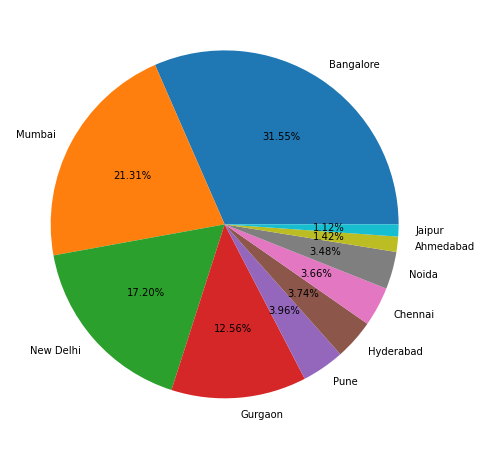

In [201]:
plt.figure(figsize=(20,8))
plt.pie(cities['City  Location'], labels=cities['index'], autopct='%0.2f%%')

**10) Print the city name and number of startups in that city also.**

In [202]:
ncities = df['City  Location'].value_counts().reset_index().head(20)

In [203]:
bold='\033[1m'
reset = '\033[0m'
city = ncities['index']
startups = ncities['City  Location']
my_dict2 = dict(zip(city,startups))
for key, value in my_dict2.items():
  print(f'City named {bold}{key}{reset} have {bold}{value}{reset} number of Startup')

City named Bangalore have 844 number of Startup
City named Mumbai have 570 number of Startup
City named New Delhi have 460 number of Startup
City named Gurgaon have 336 number of Startup
City named Pune have 106 number of Startup
City named Hyderabad have 100 number of Startup
City named Chennai have 98 number of Startup
City named Noida have 93 number of Startup
City named Ahmedabad have 38 number of Startup
City named Jaipur have 30 number of Startup
City named Kolkata have 22 number of Startup
City named Indore have 13 number of Startup
City named Goa have 11 number of Startup
City named Chandigarh have 11 number of Startup
City named Vadodara have 10 number of Startup
City named Singapore have 8 number of Startup
City named Pune  have 6 number of Startup
City named Bangalore  have 5 number of Startup
City named Coimbatore have 5 number of Startup
City named India have 4 number of Startup


**Problem Statement :**

11) Find out if cities play any role in receiving funding.

12) Find top 10 Indian cities with most amount of fundings received.

13) Find out percentage of funding each city has got (among top 10 Indian cities only).

14) Print the city and percentage with 2 decimal place after rounding off.

**Note:**
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place,

instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign.

Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.


**11) Find out if cities play any role in receiving funding.**

In [204]:
npcities = df['City  Location'].value_counts().reset_index().head(5)
bold='\033[1m'
reset = '\033[0m'
city = npcities['index']
startups = npcities['City  Location']
my_dict2 = dict(zip(city,startups))
for key, value in my_dict2.items():
  print(f'City named {bold}{key}{reset} have {bold}{value}{reset} number of Startup')

City named Bangalore have 844 number of Startup
City named Mumbai have 570 number of Startup
City named New Delhi have 460 number of Startup
City named Gurgaon have 336 number of Startup
City named Pune have 106 number of Startup


**We can see that most of the startups belongs to cities [Banglore, Mumbai, New Delhi, Gurgaon, Pune], therefore it can be said that starting a Statrtup from these cities can play some role in reciving funding based on Physicological parameters**

**12) Find top 10 Indian cities with most amount of fundings received.**

In [205]:
top_ten_city_funding = df.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False).reset_index()
top_ten_city_funding.head(10)

,City Location,Amount in USD
0,Bangalore,1.848541e+10
1,Mumbai,4.927985e+09
2,Gurgaon,3.871229e+09
3,New Delhi,3.293272e+09
4,Noida,1.262864e+09
5,Chennai,7.187670e+08
6,Pune,6.480820e+08
7,Menlo Park,4.500000e+08
8,Hyderabad,4.016762e+08
9,India,3.195000e+08


Text(0.5, 1.0, '(Top 10)\nTotal Funding/ City')

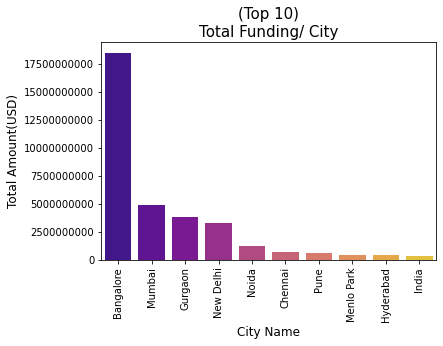

In [206]:
sns.barplot(x='City  Location', y='Amount in USD',data=top_ten_city_funding.head(10), palette='plasma')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('City Name',fontsize=12)
plt.ylabel('Total Amount(USD)', fontsize=12)
plt.title('(Top 10)\nTotal Funding/ City', fontsize=15)

**13) Find out percentage of funding each city has got (among top 10 Indian cities only).**



In [207]:
#Finding Out total number of Funding Amount

total_funding = df['Amount in USD'].sum()
total_funding

36800215996.22

In [208]:
funding_table = pd.DataFrame(top_ten_city_funding.head(10))
funding_table.columns = ['City_Name', 'Total_Funding_Received']
funding_table['Total_Funding_Received'] = funding_table['Total_Funding_Received'].apply(lambda x:int(x))
funding_table['Overall_Percentage_Weighted'] = (funding_table['Total_Funding_Received']/total_funding)*100
funding_table

,City_Name,Total_Funding_Received,Overall_Percentage_Weighted
0,Bangalore,18485408863,50.231794
1,Mumbai,4927985015,13.391185
2,Gurgaon,3871228657,10.519581
3,New Delhi,3293271515,8.949055
4,Noida,1262864000,3.431676
5,Chennai,718767000,1.953160
6,Pune,648082000,1.761082
7,Menlo Park,450000000,1.222819
8,Hyderabad,401676230,1.091505
9,India,319500000,0.868201


**14) Print the city and percentage with 2 decimal place after rounding off.**

In [209]:
funding_table['Overall_Percentage_Weighted'] = ((funding_table['Total_Funding_Received']/total_funding)*100).round(2)
funding_table['Overall_Percentage_Weighted'] = funding_table['Overall_Percentage_Weighted'].astype(str)+'%'
funding_table

,City_Name,Total_Funding_Received,Overall_Percentage_Weighted
0,Bangalore,18485408863,50.23%
1,Mumbai,4927985015,13.39%
2,Gurgaon,3871228657,10.52%
3,New Delhi,3293271515,8.95%
4,Noida,1262864000,3.43%
5,Chennai,718767000,1.95%
6,Pune,648082000,1.76%
7,Menlo Park,450000000,1.22%
8,Hyderabad,401676230,1.09%
9,India,319500000,0.87%


**15) Which type of companies got more easily funding**

In [210]:
top_5_industry_by_count = df['Industry Vertical'].value_counts().sort_values(ascending=False).head(5).reset_index()
top_5_industry_by_count.columns = ['Industry_type', 'Count']
top_5_industry_by_count.index = np.arange(1,6)
top_5_industry_by_count

,Industry_type,Count
1,Consumer Internet,935
2,Technology,478
3,Ecommerce,334
4,Healthcare,70
5,Finance,62


Text(0.5, 1.0, 'Top 5 Industry Type By Count\nWhich get more easily Funding')

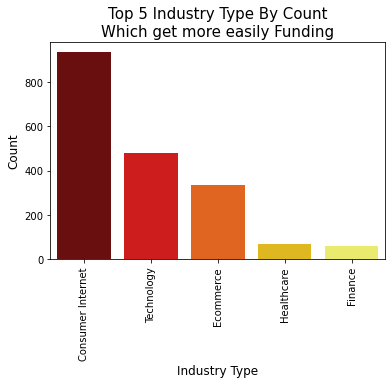

In [211]:
sns.barplot(x='Industry_type',y='Count',data=top_5_industry_by_count, palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Industry Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Industry Type By Count\nWhich get more easily Funding',fontsize=15)

**16) Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.**

In [212]:
top_5_industry_by_Funding = df.groupby('Industry Vertical')['Amount in USD'].sum().reset_index()
top_5_industry_by_Funding = top_5_industry_by_Funding.sort_values(by='Amount in USD', ascending=False).head(5)
top_5_industry_by_Funding['Percentage_of_amt_funded'] = ((top_5_industry_by_Funding['Amount in USD']/total_funding)*100).round(2).astype(str)+'%'
top_5_industry_by_Funding




,Industry Vertical,Amount in USD,Percentage_of_amt_funded
167,Ecommerce,9.734520e+09,26.45%
107,Consumer Internet,6.253032e+09,16.99%
688,Transportation,3.916632e+09,10.64%
685,Technology,2.229708e+09,6.06%
212,Finance,1.971438e+09,5.36%


In [213]:
bold='\033[1m'
reset='\033[0m'
ind_name = top_5_industry_by_Funding['Industry Vertical']
per_fund = top_5_industry_by_Funding['Percentage_of_amt_funded']
my_dict4 = dict(zip(ind_name, per_fund))
print(f'{bold}Given is the list of Top 5 Industry Type which holds most of the funding.{reset}')
for i, o in my_dict4.items():
  print(f'{bold}=>{reset}Industry {bold}{i}{reset} holds {bold}{o}{reset} of total funding.')

Given is the list of Top 5 Industry Type which holds most of the funding.
=>Industry Ecommerce holds 26.45% of total funding.
=>Industry Consumer Internet holds 16.99% of total funding.
=>Industry Transportation holds 10.64% of total funding.
=>Industry Technology holds 6.06% of total funding.
=>Industry Finance holds 5.36% of total funding.


**Problem Statement :**

20) Find top 5 startups with most amount of total funding.

21) Print the startup name in descending order with respect to amount of funding.

**Note:**
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


In [214]:
#correcting some of the startups name

df['Startup Name'] = df['Startup Name'].replace('"BYJU\\\\\'S"','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace("'BYJU\\'S'","BYJU’S")
df['Startup Name'] = df['Startup Name'].replace('BYJU\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Byju\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Flipkart.com','Flipkart')
df['Startup Name'] = df['Startup Name'].replace('OYO Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('OyoRooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyorooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Ola Cabs','Ola')
df['Startup Name'] = df['Startup Name'].replace('Olacabs','Ola')

**17) Find top 5 startups with most amount of total funding.**

In [215]:
top_5_startup = df.groupby('Startup Name')['Amount in USD'].sum()
top_5_startup.sort_values(ascending=False).reset_index().head(5)

,Startup Name,Amount in USD
0,Flipkart,4.759700e+09
1,Rapido Bike Taxi,3.900000e+09
2,Paytm,3.148950e+09
3,Ola,2.054200e+09
4,OYO,9.720000e+08


**18) Print the startup name in descending order with respect to amount of funding.**

In [216]:
top_5_startup = df.groupby('Startup Name')['Amount in USD'].sum()
top_5_startup = top_5_startup.sort_values(ascending=False).reset_index().head(5)
top_5_startup

,Startup Name,Amount in USD
0,Flipkart,4.759700e+09
1,Rapido Bike Taxi,3.900000e+09
2,Paytm,3.148950e+09
3,Ola,2.054200e+09
4,OYO,9.720000e+08


**Problem Statement :**

22) Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.


23) Print the startup name in descending order with respect to the number of funding round as integer value.


**Note:**
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


**19) Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.**

In [217]:
top_5_startup_rounds = df.groupby('Startup Name')['Amount in USD'].count()
top_5_startup_rounds = top_5_startup_rounds.sort_values(ascending=False).reset_index().head(5)
top_5_startup_rounds

,Startup Name,Amount in USD
0,Ola,13
1,Swiggy,8
2,OYO,8
3,BYJU’S,7
4,Flipkart,6


**20) Print the startup name in descending order with respect to the number of funding round as integer value.**

In [218]:
bold='\033[1m'
reset='\033[0m'
st = top_5_startup_rounds['Startup Name']
am = top_5_startup_rounds['Amount in USD']
my_dict5 = dict(zip(st, am))
print(f'{bold}Startup name in descending order with respect to the number of funding round as integer value --{reset}')
for t, y in my_dict5.items():
  print(f'{bold}=>{reset}Startup name {bold}{t}{reset} have recived funding {bold}{y}{reset} number of times.')

Startup name in descending order with respect to the number of funding round as integer value --
=>Startup name Ola have recived funding 13 number of times.
=>Startup name Swiggy have recived funding 8 number of times.
=>Startup name OYO have recived funding 8 number of times.
=>Startup name BYJU’S have recived funding 7 number of times.
=>Startup name Flipkart have recived funding 6 number of times.
